# Simulation of the spatial model
## Spatial distribution of the four densities in a cell

In [1]:
import numpy as np
from spatial.oneD.Simulation1D import Simulation1D

In [2]:
domain_size = 10
nb_space_points = 10000
duration_time = 35
time_step = 0.1

a_sim = Simulation1D(domain_size, nb_space_points, duration_time, time_step)

k = 1
ka = 1
diffusion_coefs = natural_d, aox_d = 1, 2
transport_coefs = natural_t, radiation_t = 0.05, 0.1
fragmentation_coefs = natural_f, aox_f, radiation_f = 0.2, 1, 2
permeability_coefs = ordinate, abscissa, statin_impact = 1, 0.45, 1.2
ratio_f_rate_dimers_complexes = 1.1
transport_space_cst = 10

a_sim.setup_atm_apoe_system(k, ka, diffusion_coefs, transport_coefs, fragmentation_coefs, permeability_coefs,
                            ratio_f_rate_dimers_complexes, transport_space_cst)

monomers_initial = np.zeros(nb_space_points)
dimers_initial = np.ones(nb_space_points)
apoe_initial = np.exp(- 1 * a_sim.spatial_space.space)
complexes_initial = np.zeros(nb_space_points)

a_sim.setup_system_initial_conditions(monomers_initial, dimers_initial, apoe_initial, complexes_initial)

antioxidant_times = ()
irradiation_times = ()
statin_times = ()

a_sim.setup_experimental_conditions(antioxidant_times, irradiation_times, statin_times)

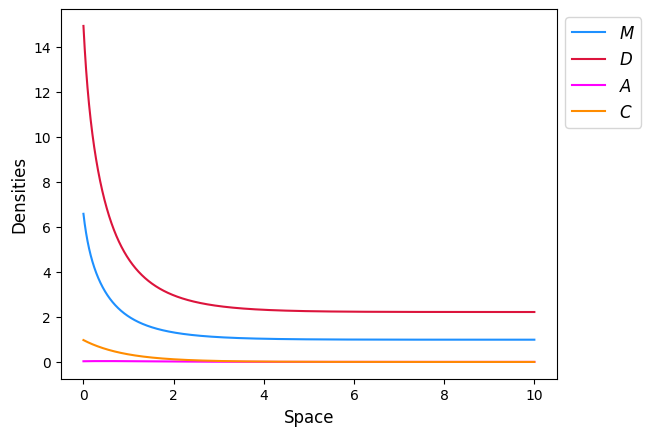

In [3]:
a_sim.simulate()

a_sim.plot_all_densities()

## Evolution of the crown over time

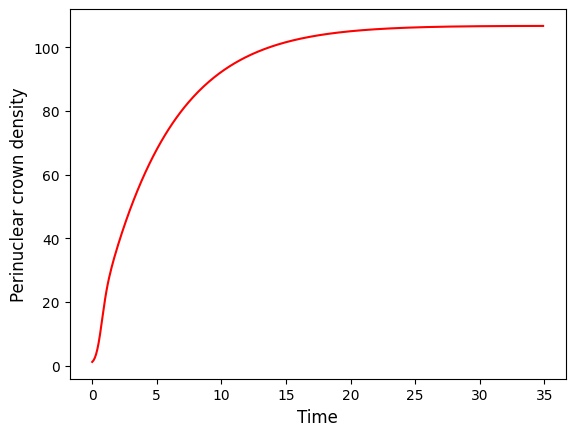

In [6]:
a_sim.plot_crown_density_over_time()

### Impact of an irradiation

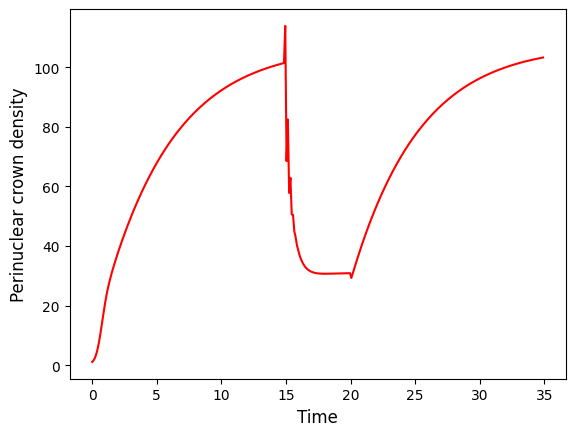

In [7]:
irradiation_times = (15, 20)

sim_irr = Simulation1D(domain_size, nb_space_points, duration_time, time_step)
sim_irr.setup_atm_apoe_system(k, ka, diffusion_coefs, transport_coefs, fragmentation_coefs, permeability_coefs,
                            ratio_f_rate_dimers_complexes, transport_space_cst)
sim_irr.setup_system_initial_conditions(monomers_initial, dimers_initial, apoe_initial, complexes_initial)
sim_irr.setup_experimental_conditions(antioxidant_times, irradiation_times, statin_times)
sim_irr.simulate()
sim_irr.plot_crown_density_over_time()

## Impact of the spatial space size on the perinuclear crown

In [ ]:
domain_sizes = np.linspace(1, 100, 100)